# Data Wrangling Part 3 - Numpy Part 2

The following report was submitted as part of my Master of Data Science coursework on Data Wrangling. This report is the third in a five part series where I showcase work on various topics relating to Data Wrangling. This report is the second of two reports on the popular library Numpy. 

This report dives deep into a number of very important topics when analysing multivariate data. This includes visualization methods including histograms, boxplots, scatterplots. It also covers basic statistical analysis techniques including correlation and data transformation. 


## Working with *numpy* Matrices (Multidimensional Data)

&emsp; **Author:** Daniel Gladman <br>
&emsp; **Originally Written:** 2023-03-13 <br>


This report will use a dataset from the National Health and Nutrition Examination Survey (NHANES) to explore the concepts of descriptive statistics, plots, and transformations on a multidimensional dataset. The data used in this report was acquired from the following Github account [Click this link to access the files](https://github.com/gagolews/teaching-data/tree/master/marek).

### Libraries
First the libraries used in this task shall be imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns

from scipy.stats import skew, zscore

Matplotlib shall be used to generate visual representations of the data, while Numpy shall be used to load and perform operations on the multidimensional data. Scipy is an external library that will provide an additional descriptive statistic that cannot be generated through Numpy. In addition, it will be used to perform data transformation. 

Seaborn is another external library that is built upon Matplotlib for further data visualization. Seaborn will be used to generate some specific charts for this report that are not possible in Matplotlib alone. Pandas is an external library that is built ontop of Numpy and is used primarily for data manipulation, analysis, and cleaning. The use of pandas is not within the scope of this report as the majority of the requirements can be fufilled using Numpy native methods alone. However, the library used to generate one of the required visualizations in this report neccesitates the use of a Pandas dataframe object as its input method. In other words, a numpy array cannot be used in this scenario and thus will need to be converted into a Pandas dataframe.

Requests is an external python library that sends HTTP requests to web servers. OS is an inbuilt python library that facilitates interaction with the operating system via python. Both these libraries will be used in conjunction to download and save the datasets using Python.

### Downloading the data.

The first task of this report will be to download the data.

In [2]:
# Download the files
raw_git_pref = "https://raw.githubusercontent.com/"
fileM = "gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv"
fileF = "gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv"

urls = [f"{raw_git_pref}{fileM}",
        f"{raw_git_pref}{fileF}"]

cwd = "./data/"


files = [] # Store a record of filenames to load data from later

for url in urls:
    # file to hold data
    csv_filename = os.path.basename(url) 
    # additional txt file to refer to comments
    text_filename = f"{csv_filename.split('.')[0]}.txt"

    if not os.path.isfile(os.path.join(cwd, csv_filename)):
        r = requests.get(url)
        if r.status_code == 200:
            with open(cwd + csv_filename, 'wb') as f:
                f.write(r.content)
        
        # Write the text file with comments       
            with open(cwd + csv_filename, 'r') as f:
                with open(cwd + text_filename, 'w') as g:
                    rows = f.readlines()
                    for row in rows:
                        if row.startswith('#'):
                            g.write(row)
        else:
            print("""There was an error downloading the file. 
                  Please investigate the issue.""")
    
    files.append(csv_filename)

This segment of code takes the urls for each file and explicitly extracts their respective filenames. Then, it checks to see if the file is currently present in the current working directory. If the file is not found, then a request is sent to download the file and save it to the directory. In addition, an extra text file is created that contains the metadata of the data. Because numpy cannot load this metadata, it will need to be either removed or skipped over before any data can be loaded in. Having an additional text file to refer to the metadata can be extremely helpful, especially given that numpy cannot handle this contextual information. In addition, adding a check to see whether the file currently exists will prevent unneccessary additional downloads of the same files should the previous code segment be run multiple times.

### Reading the Data as Numpy Matrices.
For the next task of this report, the files will be loaded into numpy.

In [3]:
for file in files:
    path = f"./data/{file}"
    with open(path) as f:
        lines = f.readlines()

    # Find the header row
    header_row = None
    for i, line in enumerate(lines):
        if not line.startswith('#'):
            header_row = i
            break

    if file.find('female') == -1:     
        male = np.loadtxt(path, 
                          delimiter=',', 
                          skiprows=header_row+1, 
                          dtype=float)
    else:
        female = np.loadtxt(path, 
                            delimiter=',', 
                            skiprows=header_row+1, 
                            dtype=float)

As mentioned earlier, Numpy is not able to handle the metadata contained within the csv files. These metadata refer to rows that begin with a 'comment' flag, which is a '#'. Because it is not usually a good idea to delete information that can be useful, it was decided that this metadata would not be removed from the downloaded files. 

Fortunately, Numpy's load text method is able to take a parameter that will skip *n* rows before loading in the data. However, the value of *n* is not known. While it is possible to open the file, manually count the number of rows that contain comments and simply pass this number into the method, this ill-advised method is prone to error. 

The above solution solves this problem by first opening the file and counting the number of rows that begin with # using a for loop. Once the loop hits a row that does not begin with #, the loop is broken thus stopping the count. This running count captures the row number where the header begins, which is passed into Numpy's loadtext method. However, because the column headers must be skipped as well, 1 is added to this count, thus providing the true starting point for Numpy to begin loading. 

The other parameters accepted by Numpy's load text method are the delimiter and the data type. The delimiter is related to csv file types and constitutes the symbol that is used to seperate the data. Passing the delimiter allows Numpy to correctly read the data. In addtion, while optional, passing in the data type will instruct numpy to treat the data as that data type.

To illustrate that the code was successful, the first five rows from both the male and female datasets will be printed using numpy slicing.

In [4]:
male[:5]

array([[ 98.8, 182.3,  42. ,  40.1,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1,  41. ,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. ,  44. ,  32. , 107.8, 109.6],
       [ 86. , 167.8,  39.5,  38.4,  29. , 106.4, 108.3],
       [ 99.4, 181.6,  40.4,  39.9,  36. , 120.2, 107. ]])

In [5]:
female[:5]

array([[ 97.1, 160.2,  34.7,  40.8,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5,  33. ,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4,  38. ,  31.8, 106.2,  92. ],
       [ 61.7, 157.4,  38. ,  34.7,  29. , 101. ,  90.5],
       [ 55.4, 154.6,  34.6,  34. ,  28.3,  92.5,  73.2]])

The above snippets provide the information pertaining to seven columns of data:

1. Weight (kg),
2. Standing height (cm),
3. Upper arm length (cm),
4. Upper leg length (cm),
5. Arm circumference (cm),
6. Hip circumference (cm),
7. Waist circumference (cm)

### Adding Body Mass Index Column

Next, Body Mass Index (BMI) shall be computed for each participant and will be appended to the data as an 8th column.

The formula for calculating BMI is:

$$
BMI = \frac {mass_{kg}}{height^{2}_{m}} 
$$

In [6]:
bmi_male = male[:, 0]/((male[:, 1]/100)**2)
male = np.column_stack((male, bmi_male))

bmi_female = female[:, 0]/((female[:, 1]/100)**2)
female = np.column_stack((female, bmi_female))

The code utilizes numpy slicing to apply the BMI formula to the corresponding weight and height columns in the data. First, all the rows are selected ":", then the respective columns 0 and 1 are used to reference the weight and height data for each participant. The result is a new numpy array that is saved to its own variable which can be utilized later on.

Then, Numpy's column_stack method is used to append the newly created BMI variable to the data.

### Drawing a combined plot with Male and Female Histograms 

Next, the computed BMI values will be used to generate histogram plots for the male and female participants. To demonstrate how setting different bin sizes can impact how the data is represented in the histogram, two methods for computing bins will be explored.

#### Freedman-Diaconis method

This method for calculating the bin sizes utilizes the IQR which is robust to outliers. The formula is as follows:

$$
h = 2\frac{IQR}{n^\frac{1}{3}}
$$

#### Sturges method

Another common method that assumes the optimal number of bins is the base 2 log of the n sample size. The formula is as follows:

$$
n_h = log_2(n)+1
$$

Fortunately, numpy is able to reproduce these formula with its histogram_bin_edges method. Both methods are considered by default.

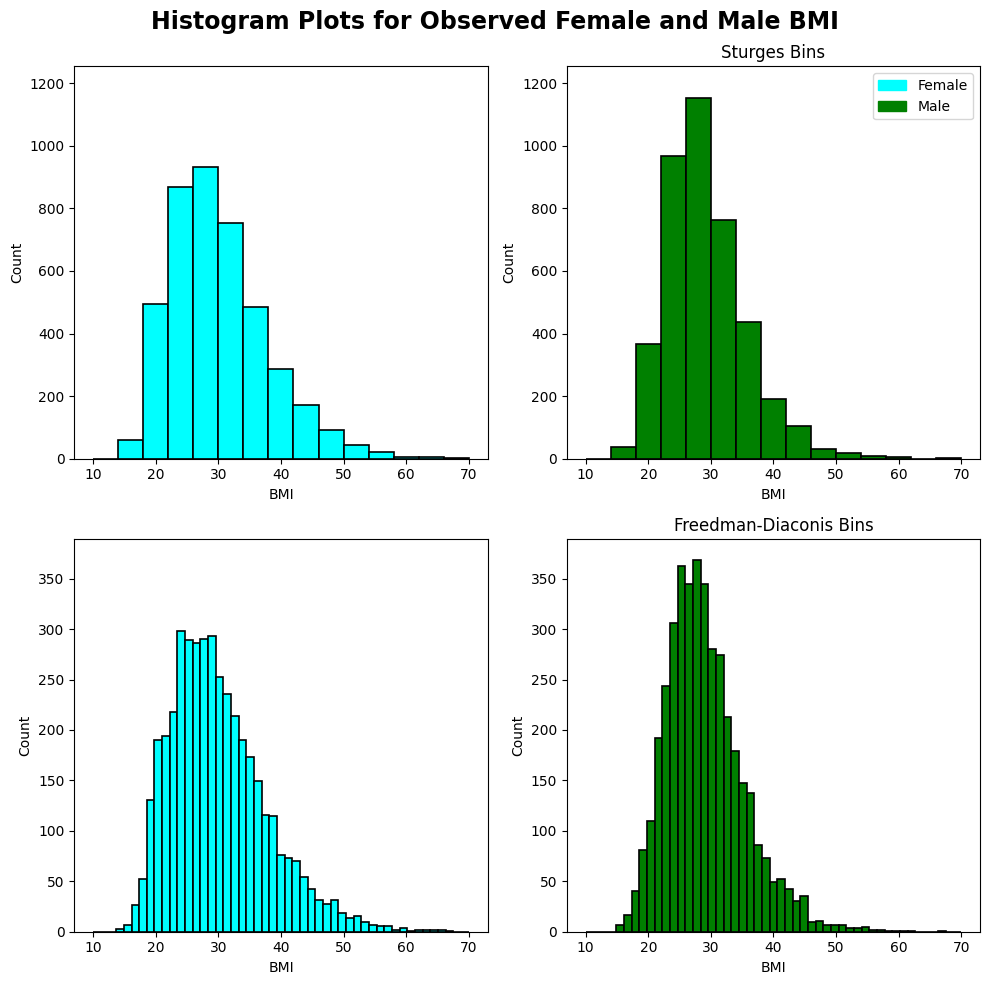

In [7]:
sturges_bins = np.histogram_bin_edges(bmi_female, bins='sturges', range=(10,70))
fd_bins = np.histogram_bin_edges(bmi_female, bins='fd', range=(10,70))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

fem_hist1 = axes[0, 0].hist(bmi_female, 
                            bins=sturges_bins, 
                            color = 'cyan', 
                            edgecolor='black', 
                            linewidth=1.2)
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Count')

fem_hist2 = axes[1, 0].hist(bmi_female, 
                            bins=fd_bins, 
                            color = 'cyan', 
                            edgecolor='black', 
                            linewidth=1.2)
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Count')

m_hist1 = axes[0, 1].hist(bmi_male, 
                          bins=sturges_bins, 
                          color = 'green', 
                          edgecolor='black', 
                          linewidth=1.2)
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Sturges Bins')

m_hist2 = axes[1, 1].hist(bmi_male, 
                          bins=fd_bins, 
                          color = 'green', 
                          edgecolor='black', 
                          linewidth=1.2)
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Freedman-Diaconis Bins')

# Ensure that the y axis limits are common
max_ylim1 = max(max(fem_hist1[0]), max(m_hist1[0])) + 100
axes[0, 0].set_ylim([0, max_ylim1])
axes[0, 1].set_ylim([0, max_ylim1])

max_ylim2 = max(max(fem_hist2[0]), max(m_hist2[0])) + 20
axes[1, 0].set_ylim([0, max_ylim2])
axes[1, 1].set_ylim([0, max_ylim2])

fig.suptitle("Histogram Plots for Observed Female and Male BMI", 
             fontsize=17, fontweight='semibold')

# Create legend entries
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color='cyan'),
    plt.Rectangle((0, 0), 1, 1, color='green')
]
labels = ['Female', 'Male']
axes[0, 1].legend(legend_elements, labels)

# Adjust the spacing between the subplots
plt.subplots_adjust(top=30, hspace=0.2)

# Show the plot
plt.tight_layout()
plt.show()

The results show that the Sturges method produces fatter bin sizes, while the Freedman-Diaconis method produces skinnier bin sizes. 

For both the male and female BMI histograms using the Sturges method, the data distibrution appears unimodal with slight skew towards the right. Both male and female distributions look approximately symmetrical. 

For the Freedman-Diaconis method histograms, the data distributions continue to appear slightly right skewed and show some signs of approximating towards symmetry. Because the bin sizes are skinner, the unimodal peaks of the Sturges histograms begin to either appear as bimodal in the case of the male distribution, or as indeterminate in the case of the female distribution. However, both the range of simlar peaks with respect to the female distribution and the bimodal peaks of the male distribution occur in close proximity to each other, therefore it is reasonable to coclude that the data is unimodal in both instances. 

### Generating Boxplots 
Next, Boxplots for the computed BMI values will be generated for the Male and Female participants. For ease of comparision, both plots will be combined into a single plot.

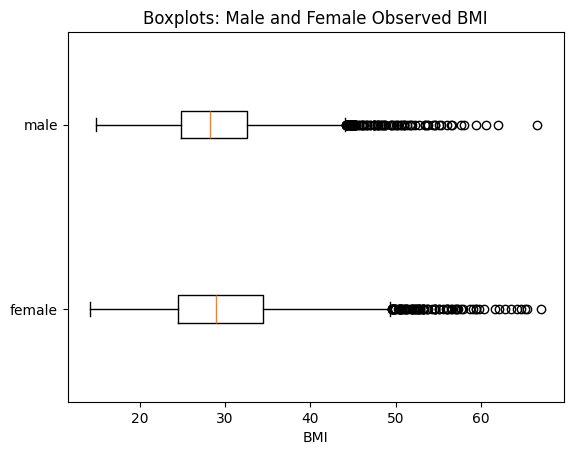

In [8]:
plt.boxplot([bmi_female, bmi_male], vert = False, labels=["female", "male"] )
plt.title("Boxplots: Male and Female Observed BMI")
plt.xlabel("BMI")
plt.show()

The median BMI and lower quartiles values appear to be similar between males and females, however the variability among the middle 50% of observed BMIs is greater among women than men. Also, there are a number of extreme values to the right side of the boxplots for both males and females, which indicates that there are a number of participants with high obersved BMIs.

It is important however not to presume that these extreme values neccessarily represent cases that would be clinically significant, or that only clinically significant cases could be identified by these extreme values. The BMI threshold for being considered underweight is <18.5 according to the WHO, and being underweight can come with its own clinically siginificant problems. The following code can be used to determine how many men and women meet this criteria from this sample.

In [9]:
sorted_data = np.sort(bmi_female)
observed_index = np.searchsorted(sorted_data, 18.5)
percentile_rank = (observed_index / len(bmi_female)) * 100
print(f'% Underweight Females = {round(percentile_rank,3)}%')

sorted_data = np.sort(bmi_male)
observed_index = np.searchsorted(sorted_data, 18.5)
percentile_rank = (observed_index / len(bmi_male)) * 100
print(f'% Underweight Males = {round(percentile_rank,3)}%')

% Underweight Females = 1.99%
% Underweight Males = 1.446%


The results show that nearly 2% of the female sample, and approximately 1.45% of the male sample are considered underweight. However, these individuals do not show up as extreme cases on the boxplot and may go unnoticed if only extreme cases were being considered when identifying individuals who may be at risk of developing health issues. Therefore it is important to properly contextualize the graphs that are produced from data.

### Descriptive Statistics
Next, some common descriptive statistics for continuous data will be computed using numpy.

In [10]:
f_mean, m_mean = np.mean(bmi_female), np.mean(bmi_male)
f_median, m_median = np.median(bmi_female), np.median(bmi_male)
f_min, m_min = np.min(bmi_female), np.min(bmi_male)
f_max, m_max = np.max(bmi_female), np.max(bmi_male)
f_std, m_std = np.std(bmi_female), np.std(bmi_male)
f_IQR = np.quantile(bmi_female, 0.75) - np.quantile(bmi_female, 0.25)
m_IQR = np.quantile(bmi_male, 0.75) - np.quantile(bmi_male, 0.25)
f_skew, m_skew = skew(bmi_female),  skew(bmi_male)

print(f"""
##                     female           male
##  BMI mean        {round(f_mean, 6)}      {round(m_mean, 6)}
##      median      {round(f_median, 6)}       {round(m_median, 6)}
##      min         {round(f_min, 6)}      {round(m_min, 6)}
##      max         {round(f_max, 6)}      {round(m_max, 6)}
##      std          {round(f_std, 6)}       {round(m_std, 6)}
##      IQR         {round(f_IQR, 6)}        {round(m_IQR, 6)}
##      skew        {round(f_skew, 6)}        {round(m_skew,6)}
""")


##                     female           male
##  BMI mean        30.103379      29.143144
##      median      28.88533       28.267741
##      min         14.203401      14.910611
##      max         67.036895      66.503798
##      std          7.755178       6.312072
##      IQR         10.01393        7.729288
##      skew        0.918339        0.970024



The above code utilizes Numpy to compute the neccessary descriptive statistics for the male and female datasets. These statstics are important as they allow inferences to be made about the two groups and how they are different and similar to each other. The exception is the skewness statistic, which is computed using the Scipy library and gives a metric for the amount of skewness in a unimodel continuous distribution. If the value is zero, then no skewness is detected. Values greater than zero suggest right skew and values less than zero suggest left skew. In normally distributed data, the skewness metric is expected to be zero.

#### Discussion of the Results

Both distributions have similar central tendencies and ranges, with the mean BMI for females being slightly higher than that of males. While the standard deviations are also simliar, the standard deviation of BMI for females is higher than that of males, suggesting that there is more spread in the  distribution of BMIs for females. However, based on these results, if a statistical test were applied to this data, it is unlikely that any evidence suggesting that the average female BMI is greater than males would be detected. The difference between the female and male mean BMIs is less than both respective standard deviations, thus meaning the probability of observing these mean BMIs given a true null hypothesis is high.

Both distributions are right skewed, indicating that there are more individuals with lower BMIs than with higher BMIs. However, the degree of skewness is slightly higher for females than for males. This can also be observed by the fact that the mean BMI scores for males and females are larger than their respective median scores. The difference between the mean and median is larger in females, which is an effect of the larger skew. Both distributions contain suspected extreme values, with the maximum BMI values being much higher than the upper quartile (Q3). The interquartile range (IQR) for females is slightly higher than that of males, indicating that there is more variability in the middle 50% of the BMI values for females.

### Generate a Scatterplot Matrix
Next, a scatterplot matrix will be generated on the female dataset for height, weight, waist/hip circumference and BMI variables.

A scatterplot matrix visuallizes all variable combinations as scatterplots all on the same chart. A scatterplot is used to plot the respective co-ordinates of each variable pair which can be used to infer relationships between the two. Along the diagonal of the matrix is the histogram of each variable. This chart is an incredibly useful chart for visuallizing multiple pairs at once.

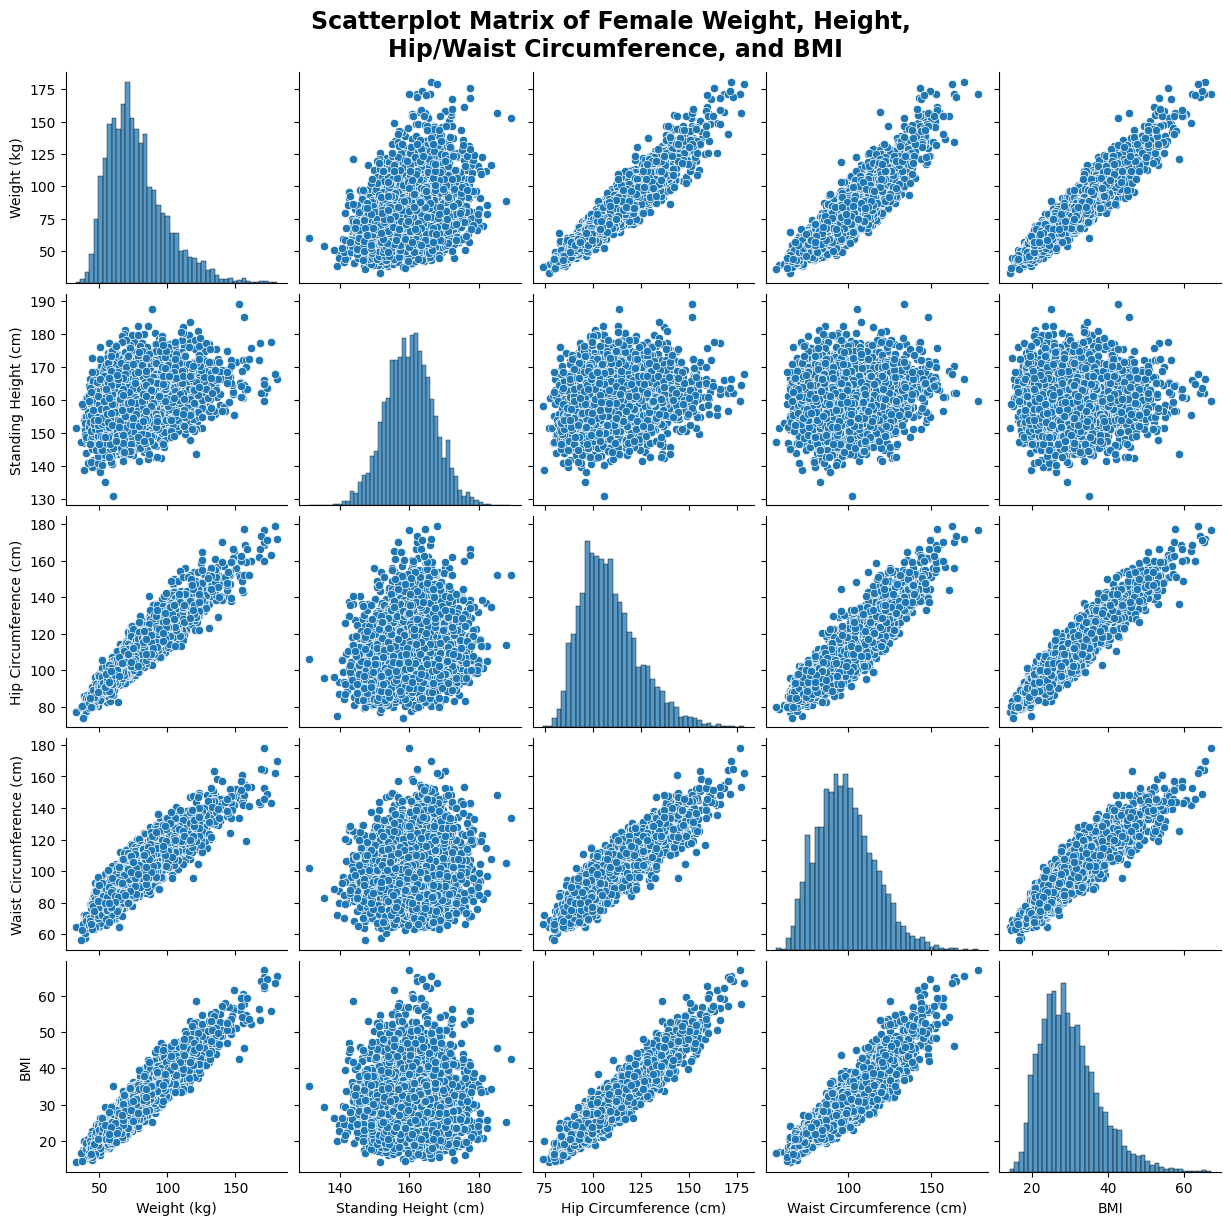

In [11]:
data = pd.DataFrame(data = female[:, [0,1,5,6,7]], 
             columns=["Weight (kg)", "Standing Height (cm)", 
                    "Hip Circumference (cm)", "Waist Circumference (cm)",
                    "BMI"])

g = sns.pairplot(data=data)

g.fig.suptitle("""Scatterplot Matrix of Female Weight, Height, 
Hip/Waist Circumference, and BMI""",
              fontsize=17, fontweight='semibold')
g.fig.subplots_adjust(top=0.93)

plt.show()

First, to utilize seaborn's very convenient pairplot method, the numpy arrays must be converted into a dataframe using pandas. This is a limitation of the method and to my knowledge there is no work around. It is theoretically possible to generate this same chart manually using numpy and custom functions, but for the sake of brevity the conversion shall be performed.

Once the data is converted into a Dataframe and is provided with column names for each variable, the data can simply be passed into the method and the plot is generated. Further customizations can be made which shall be demonstrated later.

### Correlation: Pearson and Spearman correlation coefficients

Correlation refers to the strength and direction of the relationship between two variables. By computing a correlation coefficient, it is possible to infer how closely two variables are related to each other, and whether the relationship is positive or negative. A positive relationship means that as the value of one variable within the pair increases, the other variable will also increase. A negative relationship on the other hand means that as the value of one variable within the pair increases, the other variable will decrease.

Two common methods for computing a correlation coefficient are Pearson's correlation coefficient and Spearman's rank correlation coefficient.

#### Pearson's correlation coefficient

Also known as Pearson's r, measures the linear relationship between two continuous variables. It ranges from -1 to +1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and +1 indicates a perfect positive correlation. Proper inferences from Pearson's r requires the data to meet some assumptions that will not be discussed here.

#### Spearman's rank correlation coefficient

Also known as Spearman's rho, measures the relationship between two variables based on their ranks rather than their actual values. It also ranges from -1 to +1, where -1 indicates a perfect negative monotonic relationship, 0 indicates no monotonic relationship, and +1 indicates a perfect positive monotonic relationship. Because the computation is based on ranked values rather than the actual values, it is used for non-parametric testing. In other words, this coeffiecient can be used with non-linear and non-normally distributed data.

The following code will generate a chart with heatmaps providing both the pearson and spearman coefficients.

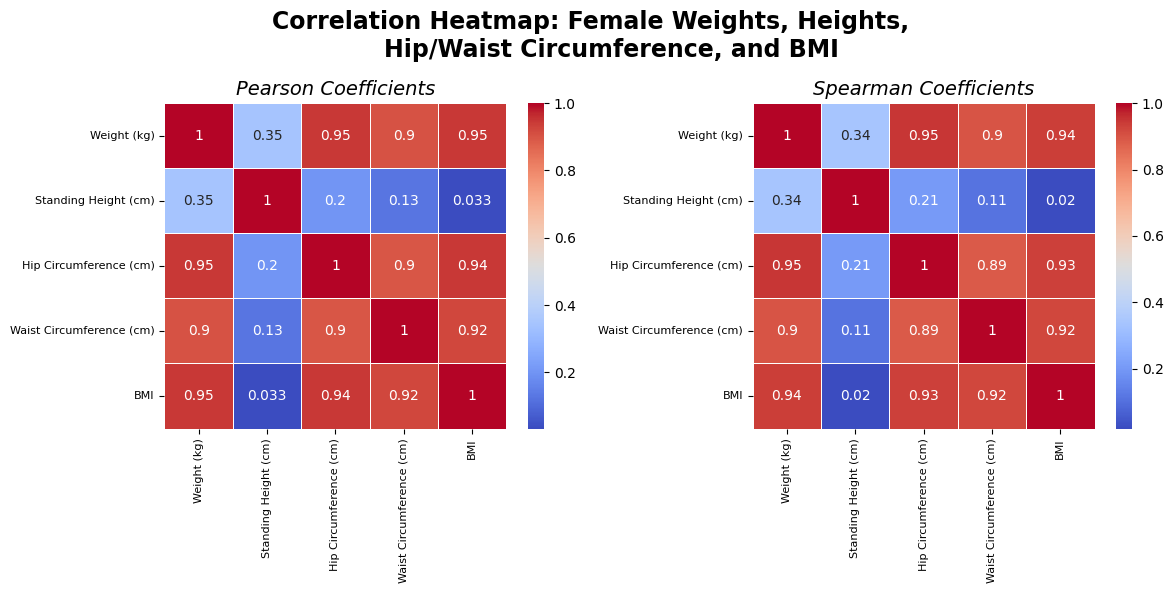

In [12]:
pearson_corr = data.corr('pearson')
spearman_corr = data.corr('spearman')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title("Pearson Coefficients", fontdict={'fontsize':14, 
                                                    'fontstyle':'italic'})
sns.heatmap(pearson_corr, 
            annot=True, 
            cmap='coolwarm', 
            ax= axes[0], 
            linewidth=.5)
axes[0].tick_params(axis='both', 
                    labelsize=8)


axes[1].set_title("Spearman Coefficients", fontdict={'fontsize':14, 
                                                     'fontstyle':'italic'})
sns.heatmap(spearman_corr, 
            annot=True, 
            cmap='coolwarm', 
            ax = axes[1], 
            linewidth=.5)
axes[1].tick_params(axis='both', 
                    labelsize=8)

fig.suptitle("""Correlation Heatmap: Female Weights, Heights, 
    Hip/Waist Circumference, and BMI""", 
             fontsize=17, fontweight='semibold')
plt.tight_layout()
plt.show()

The results of this code show two subplots being created and combined into a single figure. The colours represent the strength of the relationship, but not the direction.

To better see how these correlations look alongside the data, a customized pairplot will be generated by this code. However, because the bottom half of the matrix is typically redundant, a kernal density estimator will be applied that estimates roughly where the data is clustering. This is more computationally expensive to compute, but it will provide more information than a simple scatterplot.

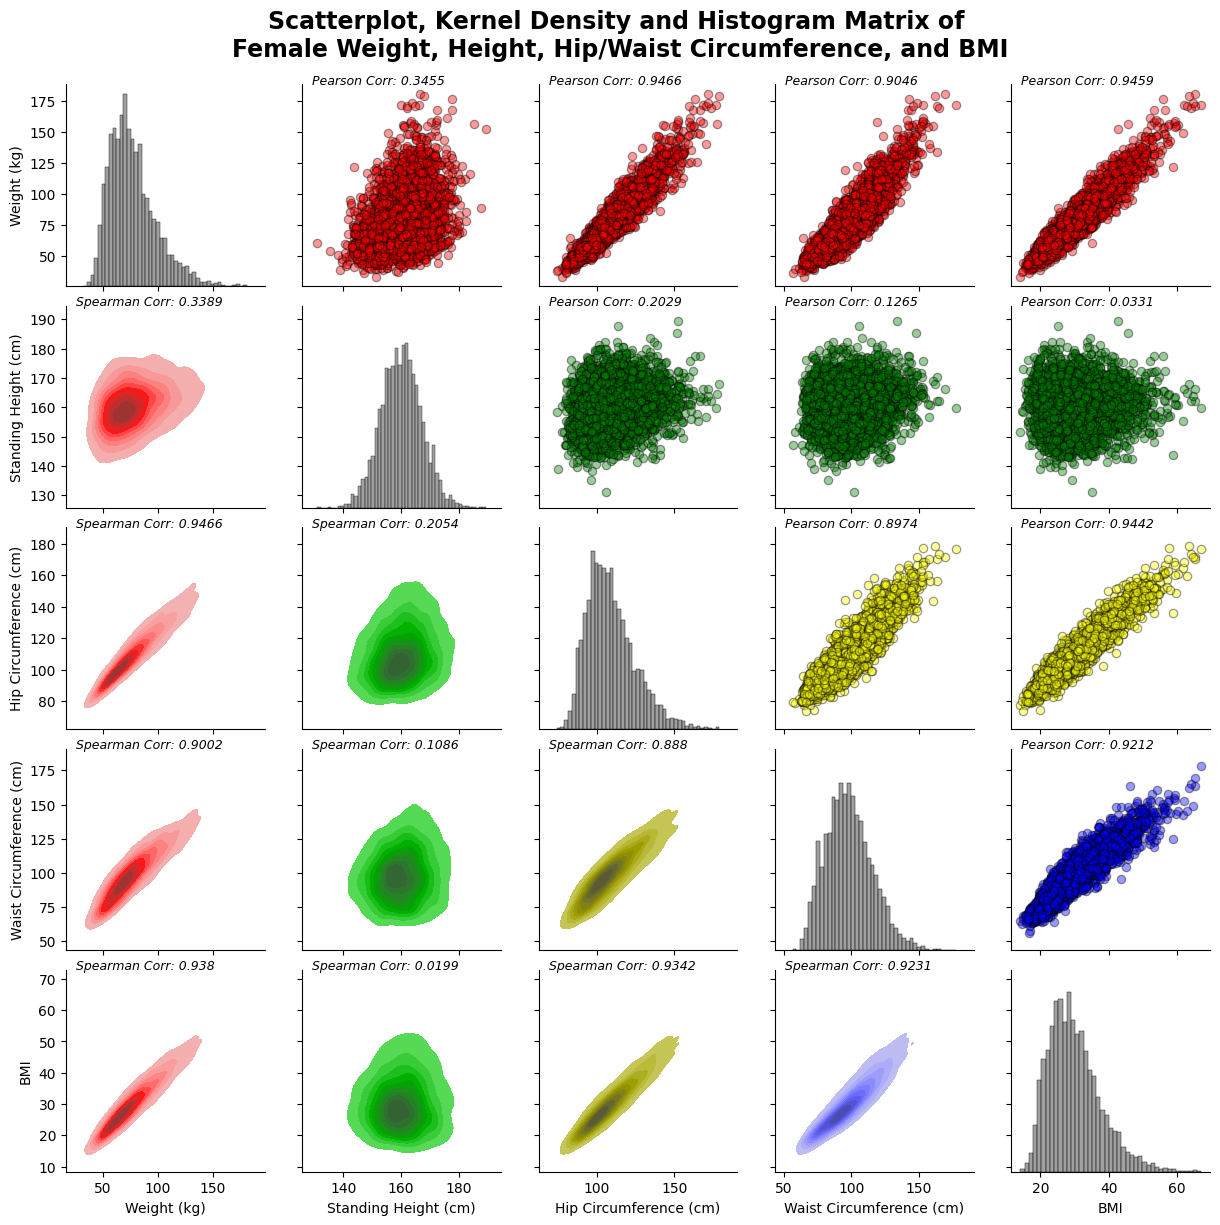

In [13]:
# Create the Grid
g = sns.PairGrid(data)
# Define the colours on the grid
colours = ['red', 'green', 'yellow', 'blue']

# Create the upper triangle scatter plots 

# Gets the upper triangle axis co-ordinates
ul, ur = np.triu_indices_from(g.axes, k=1) 

for i, j in zip(ul, ur):
    # get col names
    x_var = g.data.columns[j] 
    y_var = g.data.columns[i] 
    #assign first colour
    colour = colours[i]
    # create plot with text
    g.axes[i, j].scatter(data[x_var], 
                         data[y_var], 
                         color=colour, 
                         alpha = 0.4, 
                         linewidths = 0.9, 
                         edgecolors = 'black')
    g.axes[i,j].text(0.05, 1.05, 
                    s=f'Pearson Corr: {round(pearson_corr.values[i][j],4)}', 
                    transform=g.axes[i,j].transAxes, 
                    ha='left', 
                    va='top',
                    fontdict= {'fontsize':9, 
                               'fontstyle':'italic'})
    
# Create the diagonal histograms 
g.map_diag(sns.histplot, color='grey')

# Create the lower triangle kernal density plots

# Gets the lower triangle axis co-ordinates
ll, lr = np.tril_indices_from(g.axes, k=-1)

for i, j in zip(ll, lr):
    x_var = g.data.columns[j]
    y_var = g.data.columns[i]
    colour = colours[j]
    sns.kdeplot(data, x=x_var, y=y_var, fill=True, ax=g.axes[i, j], color=colour)
    g.axes[i,j].text(0.05, 1.05, 
                s=f'Spearman Corr: {round(spearman_corr.values[i][j],4)}', 
                transform=g.axes[i,j].transAxes, 
                ha='left', 
                va='top',
                fontdict= {'fontsize':9, 
                            'fontstyle':'italic'})
    
g.fig.suptitle("""Scatterplot, Kernel Density and Histogram Matrix of 
Female Weight, Height, Hip/Waist Circumference, and BMI""",
              fontsize=17, fontweight='semibold')
g.fig.subplots_adjust(top=0.92)

plt.show()

The results show that among all the variable pairs, height is poorly correlated, while the remaining variables; weight, hip/waist circumference, and BMI are strongly correlated. 

The strong correlation can be seen by the narrow borders around the data, almost resembling a straight line. The correlation coefficients from these pairs range from 0.89 to 0.95 which is very strong. The directions are all positive as evidenced by each variable increasing in line with its pair. On the other hand, the height variable looks more circular when paired with the other variables.

The kernel density estimators provide interesting insights about where the data appears to cluster. This information is somewhat lost when looking at the scatterplots, even when the transparency of the dots is lowered. In other words, when dots are stacked ontop of each other, it is difficult to know how many dots are appearing under the top layer. 

For example, the darkest zone between BMI and weight appears to be between BMI = (~20, ~30) and Weight = (~50, ~80). This means that a larger proportion of the overall participants fit this profile.

### Transformations: Computing Zscores

Z-scores are a type of standardized score that encapsulates the number of standard deviations any given data point is away from the average.

The z-score transformation involves subtracting the mean of a distribution from each data point and then dividing by the standard deviation of the distribution. 

The formula for calculating the z-score of a data point x is:

$$
\text{z score} = \frac{(x - mean)}{\text {standard deviation}}
$$

Z-scores have a mean of 0 and a standard deviation of 1 by definition. This means that once all data are transformed into z-scores, computing the mean and standard deviation on these transformed values will be 0 and 1 respectively. This transformation is useful because it makes it possible to compare data sets from different distributions that may have different scales and units of measurement.

Let's take the first female participant as an example. Her raw measurements are as follows:

In [14]:
female[0]

array([ 97.1       , 160.2       ,  34.7       ,  40.8       ,
        35.8       , 126.1       , 117.9       ,  37.83504078])

#### Method 1: Scipy

Scipy has a built in method that computes z-scores when passed an array. 

In [15]:
zfemale = zscore(female)
zfemale[0]

array([ 0.91429508,  0.00895038, -0.56739463,  1.13298804,  0.55084546,
        1.08316157,  1.11578462,  0.9969677 ])

The above code is simple, easy to read and understand.

#### Method 2: Numpy methods.

Unlike scipy, Numpy does not have an inbuilt method to implement the z-score transformation. However, the formula for computing z-scores is simple enough and each of the parts can be computed using numpy methods.

In [16]:
zfemale2 = np.zeros(female.shape)

for i in range(zfemale2.shape[1]):
    m, sd = np.mean(female[:,i]), np.std(female[:,i])
    zfemale2[:,i] = np.subtract(female[:,i], m) / sd

zfemale2[0]

array([ 0.91429508,  0.00895038, -0.56739463,  1.13298804,  0.55084546,
        1.08316157,  1.11578462,  0.9969677 ])

The code above works by first initializing a new numpy array of the same shape which will serve as the container for the transformed values. Then, a loop is performed over the numbers in the range of the array length where the formula is applied to each element in the array.

However, this implementation is inefficient due to the for loop. It is possible to achieve the same result using vectorizing functions. 

In [17]:
m, sd = np.mean(female, axis=0), np.std(female, axis=0)
zfemale3 = (female - m) / sd
zfemale3[0]

array([ 0.91429508,  0.00895038, -0.56739463,  1.13298804,  0.55084546,
        1.08316157,  1.11578462,  0.9969677 ])

The same result is achieved by adding an axis parameter to the numpy mean and std methods. This applies each respective function across all columns, which can then be used to perform the neccesary operations on the original data.

As an additional exploratory exercise, the relative perfomance of each method shall be tested.

In [18]:
%%timeit
zfemale = zscore(female)

370 µs ± 4.14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%%timeit
zfemale2 = np.zeros(female.shape)

for i in range(zfemale2.shape[1]):
    m, sd = np.mean(female[:,i]), np.std(female[:,i])
    zfemale2[:,i] = np.subtract(female[:,i], m) / sd

287 µs ± 8.77 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
%%timeit
m, sd = np.mean(female, axis=0), np.std(female, axis=0)
zfemale3 = (female - m) / sd

237 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The results show that as expected the vectorized implementation of z-score transformation was the fastest. However, it was somewhat surprizing to see that the Scipy method was slower than the numpy method that utilized a for loop. While Scipy is a convenient tool for computing z-scores, the formula may not be difficult enough to warrant importing an additional library just to compute this metric. 

### Plotting the Zscores
As before, the customized matrix will be computed on the z-score transformtation data.

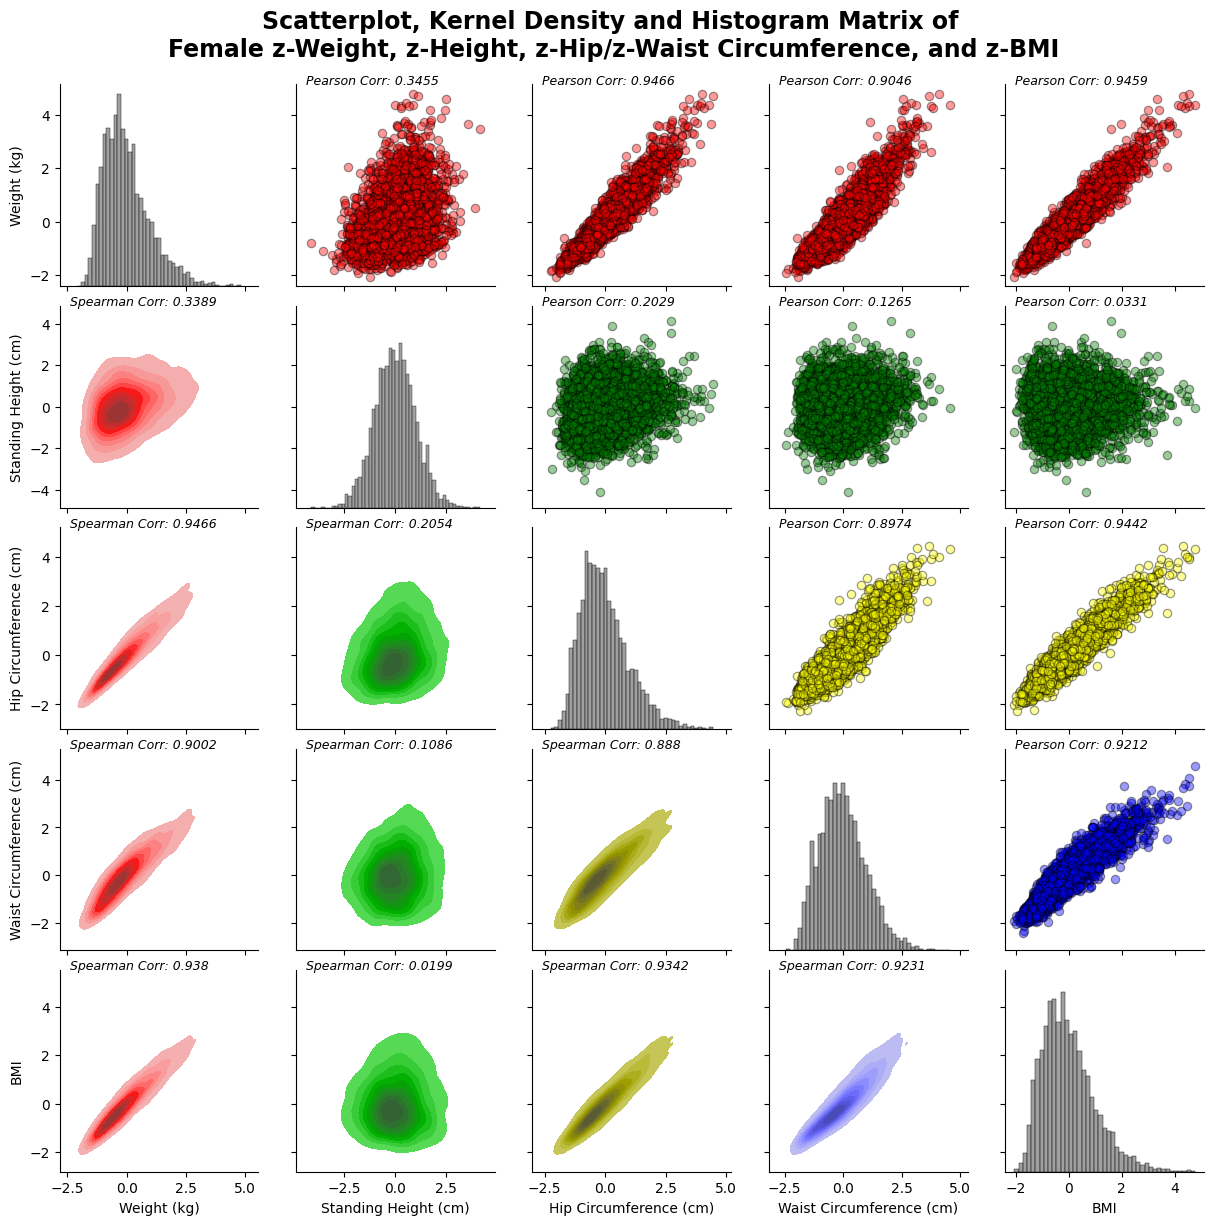

In [21]:
data = pd.DataFrame(data = zfemale[:, [0,1,5,6,7]], 
             columns=["Weight (kg)", "Standing Height (cm)", 
                    "Hip Circumference (cm)", "Waist Circumference (cm)",
                    "BMI"])


pearson_corr = data.corr('pearson')
spearman_corr = data.corr('spearman')

# Create the Grid
g = sns.PairGrid(data)
# Define the colours on the grid
colours = ['red', 'green', 'yellow', 'blue']

# Create the upper triangle scatter plots 

# Gets the upper triangle axis co-ordinates
ul, ur = np.triu_indices_from(g.axes, k=1) 

for i, j in zip(ul, ur):
    # get col names
    x_var = g.data.columns[j] 
    y_var = g.data.columns[i] 
    #assign first colour
    colour = colours[i]
    # create plot with text
    g.axes[i, j].scatter(data[x_var], 
                         data[y_var], 
                         color=colour, 
                         alpha = 0.4, 
                         linewidths = 0.9, 
                         edgecolors = 'black')
    g.axes[i,j].text(0.05, 1.05, 
                    s=f'Pearson Corr: {round(pearson_corr.values[i][j],4)}', 
                    transform=g.axes[i,j].transAxes, 
                    ha='left', 
                    va='top',
                    fontdict= {'fontsize':9, 
                               'fontstyle':'italic'})
    
# Create the diagonal histograms 
g.map_diag(sns.histplot, color='grey')

# Create the lower triangle kernal density plots

# Gets the lower triangle axis co-ordinates
ll, lr = np.tril_indices_from(g.axes, k=-1)

for i, j in zip(ll, lr):
    x_var = g.data.columns[j]
    y_var = g.data.columns[i]
    colour = colours[j]
    sns.kdeplot(data, x=x_var, y=y_var, fill=True, ax=g.axes[i, j], color=colour)
    g.axes[i,j].text(0.05, 1.05, 
                s=f'Spearman Corr: {round(spearman_corr.values[i][j],4)}', 
                transform=g.axes[i,j].transAxes, 
                ha='left', 
                va='top',
                fontdict= {'fontsize':9, 
                            'fontstyle':'italic'})
    
g.fig.suptitle("""Scatterplot, Kernel Density and Histogram Matrix of 
Female z-Weight, z-Height, z-Hip/z-Waist Circumference, and z-BMI""",
              fontsize=17, fontweight='semibold')
g.fig.subplots_adjust(top=0.92)

plt.show()

The results of this matrix are virtually identical to before. Applying z-score transformation does not alter the data, but instead changes the representation of the data. This time, the x and y axes of each plot are easier to understand because they all fall within a common scale. 

### Ordered Standardized BMI Scores
The final exercise of this report will be to analyse five participants with the lowest and highest respective Standardized BMI scores and attempt to make inferences about the multivariate relationships between BMI and the other variables.

In [22]:
lowestBMIs = np.argsort(zfemale[:,7])[:5]
highestBMIS = np.argsort(zfemale[:,7])[-5:]

The above code uses numpy's argsort method on all rows and the 8th column (which is denoted 7 in python), and then a slice is made on the result. The argsort method will provide the element Ids in sorted order from smallest to largest. To get the smallest BMIs, a slice of '[:5]' will achieve the desired outcome as the first 5 elements will be returned, while a slice of [-5:] , which returns the last 5 elements will represents the largest BMIS.

Next, a brief analysis will be performed on the findings.

In [23]:
zfemale[lowestBMIs][:,:7]

array([[-2.07978523, -1.22299143, -1.5478402 , -1.16905675, -2.1947611 ,
        -2.0405496 , -1.94212128],
       [-1.88017988, -0.18929313, -1.71835247,  0.38637892, -2.4443617 ,
        -1.85491922, -2.05708015],
       [-1.53667299,  1.80730222,  0.62619127,  0.5730312 , -2.26607556,
        -1.6756899 , -1.7064556 ],
       [-1.843044  , -0.26009438, -0.22637009,  0.51081377, -2.30173278,
        -2.25178417, -1.85590213],
       [-1.61094475,  0.88688592, -0.09848588,  0.47970506, -2.21258971,
        -1.82931504, -1.71220354]])

For the females with the lowest BMIs, height, and arm and leg lengths do not appear to be important in terms of predicting the lowest BMI participants 

For example, some of the female participants were taller than average, while others were shorter than average. Moreover, the number of standard deviations does not exceed 2, which from a statistical perspective would unlikely be significant difference with any meaningful consequence. 

On the other hand, weight, arm/hip/waist circumference seem to be more important factors among the females with the lowest BMI. In particular, hip circumference seems to be a consisent factor with each participant recording hip circumferences less than 2 standard deviations from the average. In fact, many of the recorded z-scores are either approaching or exceeding the threshold to be deemed significantly different from average at an alpha of 0.01 (z = -/+ 2.3264). This makes sense as from a biological perspective, the pelvic region is an important region in terms of child rearing, and this region tends to be prioritized in terms of size and strength. Given that, it does not appear surprizing that the women with the lowest BMI are going to typiclly be smaller in this region as any gains in mass are likely to be observed in this region first.

In [24]:
zfemale[highestBMIS][:,:7]

array([[ 4.2472403 ,  0.29215539,  1.86240524, -0.98240447,  2.3693641 ,
         4.10445598,  3.81731803],
       [ 4.45612963,  0.50455915,  1.69189297, -1.13794804,  3.34993787,
         3.98283607,  2.90339503],
       [ 4.34936397,  0.27799514,  2.84285081,  1.94181459,  4.36616887,
         3.9188256 ,  3.75409065],
       [ 4.8042785 ,  0.88688592,  2.11817365,  1.81737973,  3.77782461,
         4.02124236,  4.08172343],
       [ 4.36328993, -0.03353037, -0.05585782, -0.17357792,  2.77942222,
         4.31569054,  4.57029862]])

For females with the highest BMI, similar findings were observed in terms of which measurement types were important, but as expected, the direction of the relationships were reversed.

This time, weight appeared to be the most consistent factor among the women with the highest BMI. Each participant weighed 4 standard deviations more than the average female, and many reached the critical threshold for statistical significance at an alpha of 0.00001 (z = -/+ 4.26489). This means that the probability of observing these recorded weights given the current average, assuming these recorded weights are no different from average, is less than 0.001%. Hip and waist circumference were of a similar magnitude to weight, while arm circumference appeared less influential but still was consisentently higher among the participants with the highest BMI.



### Conclusion

In summary, this report was able to extract insights regarding the nature of BMI and how it relates to body composition metrics by analysing National Health and Nutrition Examination Survey data. It was able to achieve this by using numpy to compute descriptive statistics and packages such as matplotlib and seaborn to create visuals that aid the analysis.

Some additional analysis could be performed on the male participants to see what elements of body composition are more associated with BMI. An analysis that compares the top 50 men and women in terms of BMI and compare how body composition differs between men and women at higher and lower BMIs. Statistical packages that perform t-tests could also be employed to address between group hypotheses.